In [1]:
import sys
import os
sys.path.append(os.path.abspath("../"))

import pandas as pd
import matplotlib.pyplot as plt

from src.data_processing import load_news
from src.article_analysis import (
    compute_headline_length, 
    publisher_stats, 
    daily_hourly_counts, 
    extract_keywords, 
    run_lda
)
from src.visualization import (
    plot_daily_counts, 
    plot_hourly_counts,
    plot_keyword_analysis,
    plot_lda_heatmap
)

plt.style.use("seaborn-v0_8-darkgrid")

In [2]:
news_fp = "../data/raw_analyst_ratings.csv"
df = load_news(news_fp)
df.head()

,Unnamed: 0,headline,url,publisher,date,stock,news_date
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,2020-06-05
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,2020-06-03
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,2020-05-26
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,2020-05-22
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,2020-05-22


In [3]:
df = compute_headline_length(df)
print(df['headline_length'].describe())

count    55987.000000
mean        80.015254
std         56.126094
min         12.000000
25%         42.000000
50%         63.000000
75%         91.000000
max        512.000000
Name: headline_length, dtype: float64


In [4]:
pub_counts, pub_mean_lengths = publisher_stats(df)
print(pub_counts)
print(pub_mean_lengths)


publisher
Benzinga Newsdesk    14750
Lisa Levin           12408
ETF Professor         4362
Paul Quintaro         4212
Benzinga Newsdesk     3177
                     ...  
Jennifer Lynn            1
Tatro Capital            1
webmaster                1
Thomas Stein             1
Usman Rafi               1
Name: count, Length: 225, dtype: int64
publisher
Benzinga Newsdesk        226.071766
Benzinga  Newsdesk       175.562500
Investor Ideas           122.000000
Othanas Economopoulos    115.000000
luke@benzinga.com        106.804428
                            ...    
Scout Finance             28.000000
Dave Wienke               27.000000
Tatro Capital             26.000000
Jane Sanders              25.000000
Spencer Purdy             25.000000
Name: headline_length, Length: 225, dtype: float64


In [5]:
daily_counts, hourly_counts = daily_hourly_counts(df)


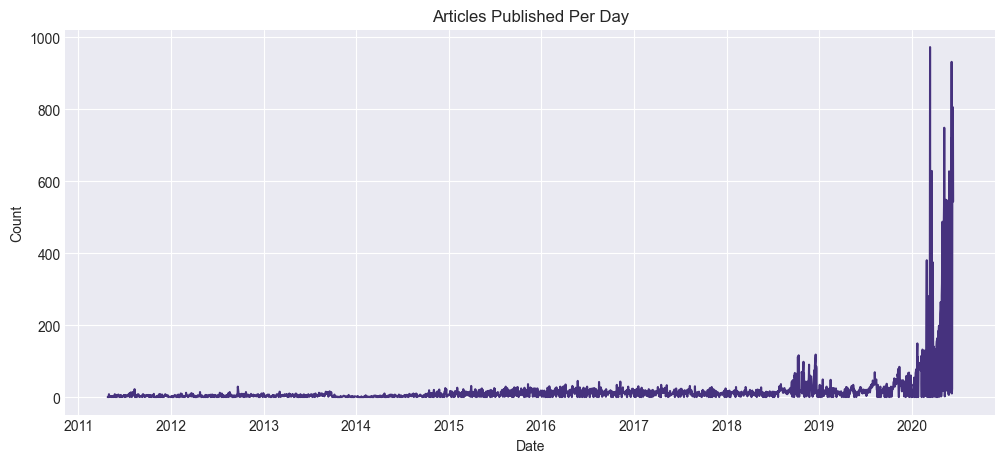

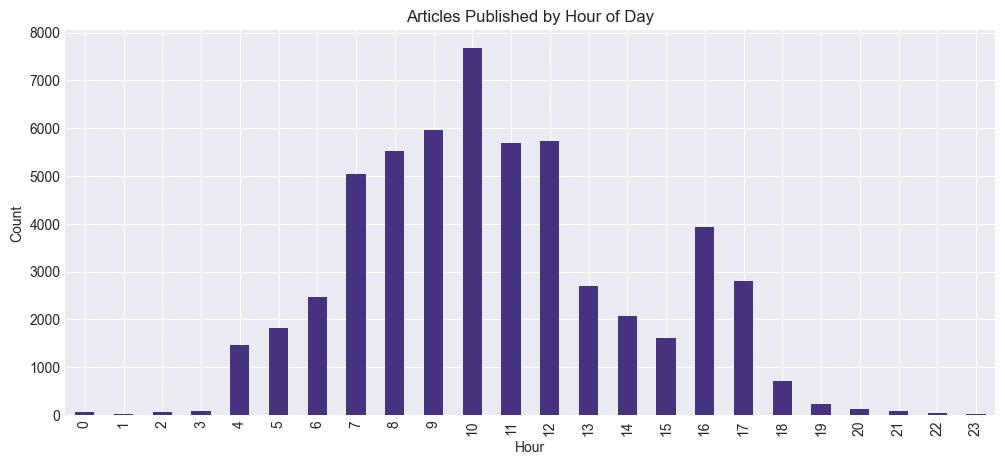

In [6]:
plot_daily_counts(daily_counts)
plot_hourly_counts(hourly_counts)

In [7]:
vectorizer, keywords_matrix, keywords = extract_keywords(df, max_features=30)
print("Top keywords:", keywords)


Top keywords: ['52' 'amid' 'companies' 'eps' 'estimate' 'etfs' 'friday' 'higher' 'highs'
 'hit' 'lower' 'lows' 'maintains' 'market' 'mid' 'moving' 'new' 'price'
 'q1' 'reports' 'sales' 'session' 'shares' 'stocks' 'target' 'thursday'
 'trading' 'vs' 'week' 'yesterday']


In [8]:
topics = run_lda(keywords_matrix, keywords, n_topics=5)
for i, words in topics.items():
    print(f"\nTopic #{i}: {words}")


Topic #1: ['shares', 'reports', 'vs', 'q1', 'maintains', 'estimate', 'sales', 'target', 'price', 'eps']

Topic #2: ['yesterday', 'week', 'stocks', 'market', 'lower', 'amid', 'higher', 'companies', 'trading', 'shares']

Topic #3: ['lower', 'friday', 'higher', 'thursday', 'shares', 'moving', 'stocks', 'mid', 'session', 'market']

Topic #4: ['trading', 'session', 'hit', 'lows', '52', 'friday', 'yesterday', 'new', 'week', 'stocks']

Topic #5: ['friday', 'reports', 'thursday', 'highs', 'etfs', 'lows', 'stocks', 'week', 'hit', '52']


Keyword analysis saved to keyword_visualizations.png


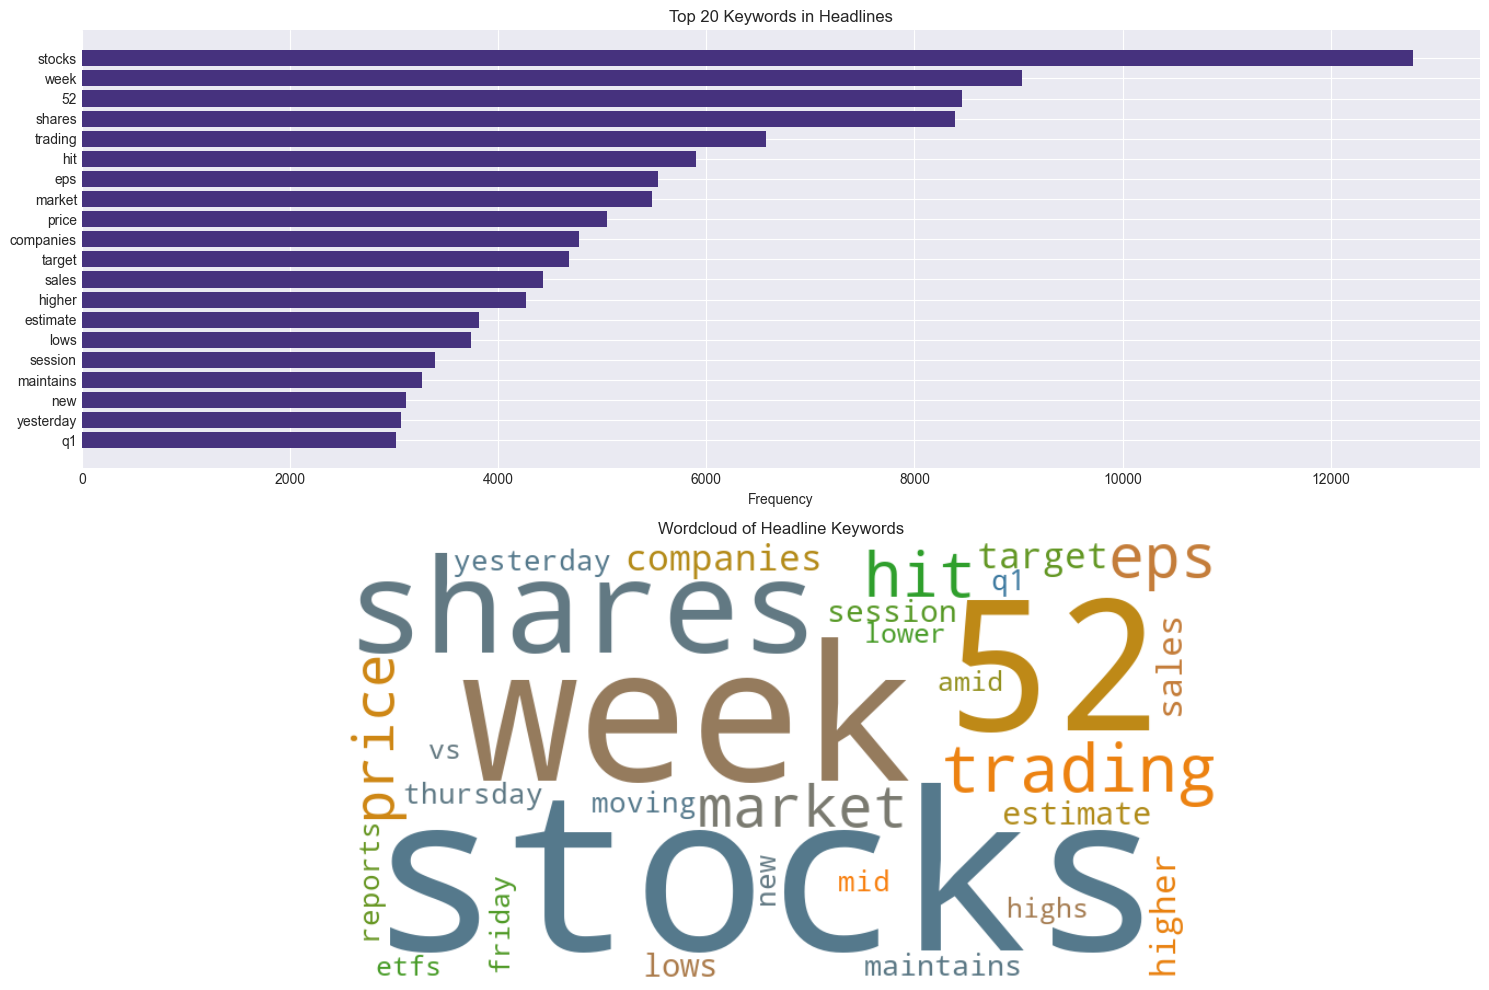

In [9]:
plot_keyword_analysis(
    keywords_matrix, 
    keywords, 
    save_path="keyword_visualizations.png"
)

LDA Heatmap saved to lda_topics.png


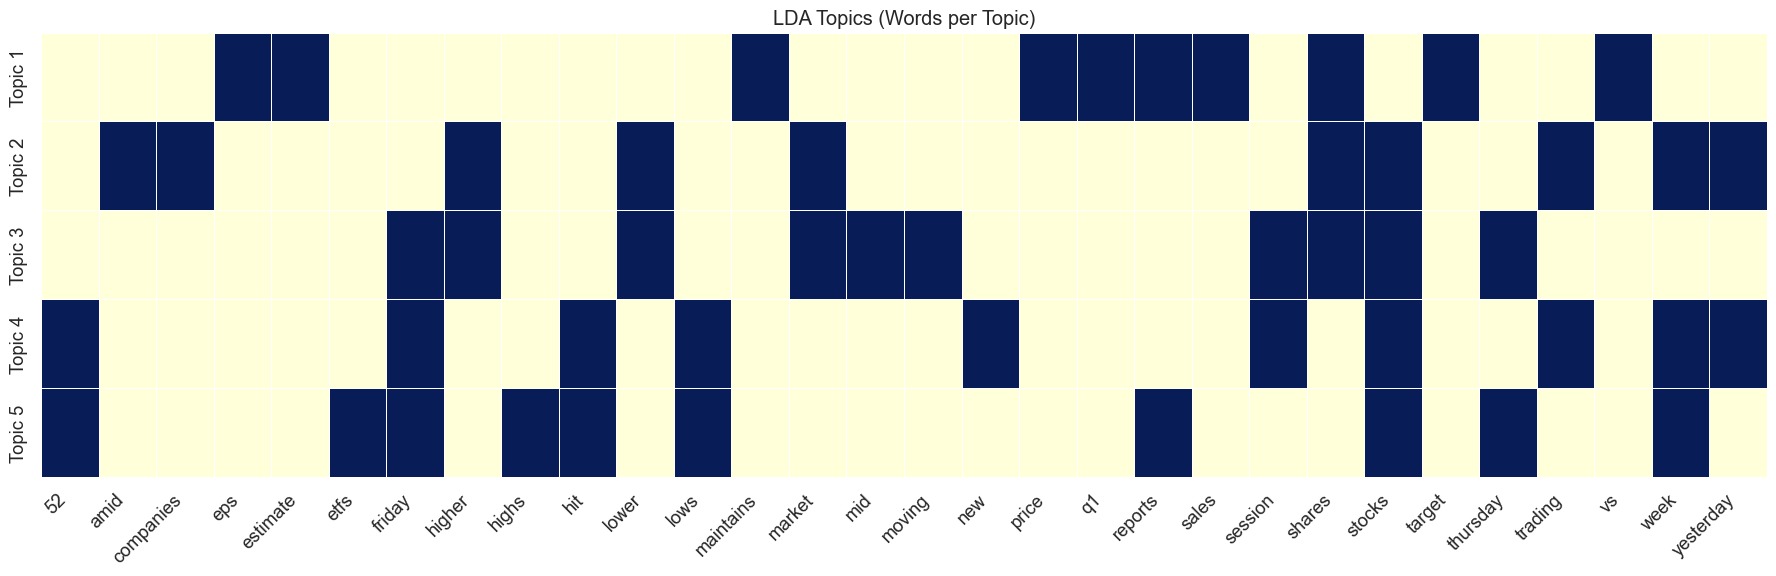

In [10]:
plot_lda_heatmap(
    topics, 
    save_path="lda_topics.png"
)